In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn

In [ ]:
# Check to see if we have a GPU to use for training
device = 'cuda' if torch.cuda.is_available() else 'CPU'
print('A {} device was detected.'.format(device))

# Print the name of the cuda device, if detected
if device=='cuda':
    print (torch.torch.cuda.get_device_name(device=device))

A cuda device was detected.
Tesla T4


In [ ]:
df=pd.read_csv("dataset.csv")
# k=df.corr()
# k['Price'].sort_values()

In [ ]:
df.describe()

In [ ]:
k=df
k = k[ (k['Price'] <= 45000000)]
k.shape

(5711, 41)

In [ ]:
# df['Price']  = df['Price']/10
# df['Price']  = df['Price']*10

In [ ]:
len(df)

6950

In [ ]:
# df = df[ (df['Price'] <=10) ]

In [ ]:
#  df[ (df['Price'] >=10) ].count()

In [ ]:
# df = df[ (df['Price'] <= 50) ]

# scale  0 -75 lakhs

In [ ]:
# scale_min

2.0

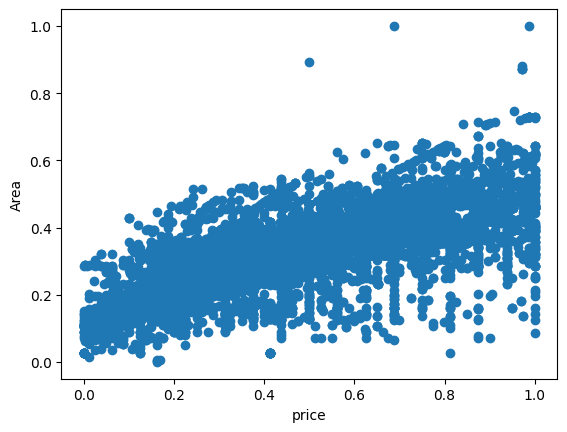

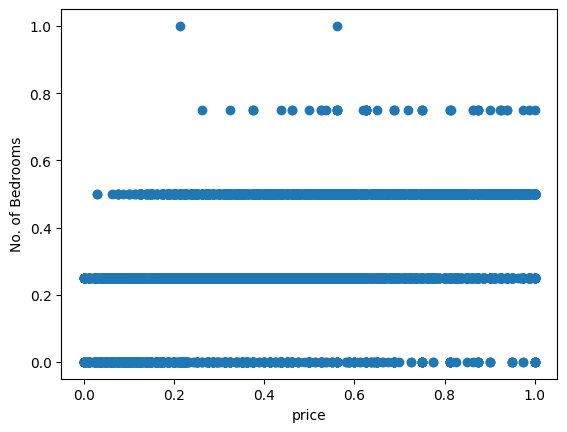

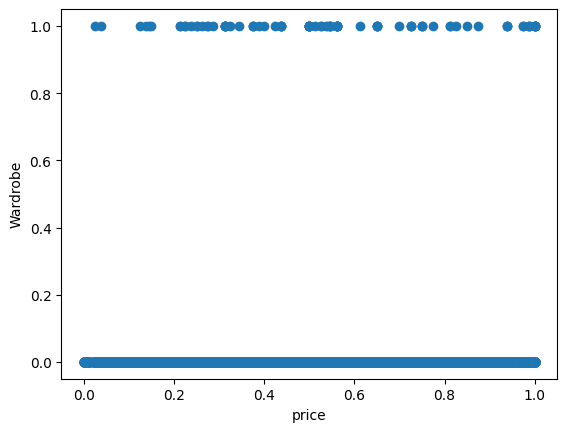

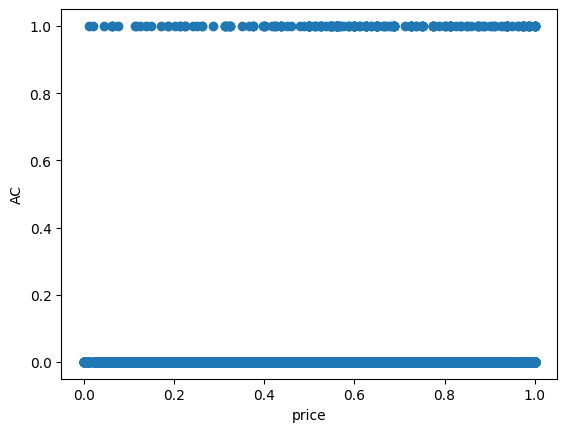

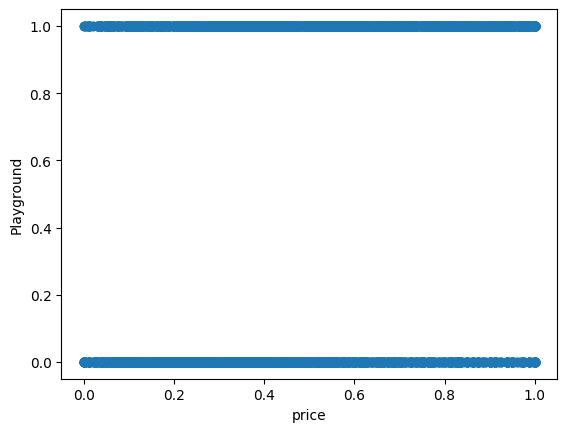

In [ ]:
for i in feature_names:
  plt.scatter(df['Price'],df[i])
  plt.ylabel(i)
  plt.xlabel('price')
  plt.show()

In [ ]:
for col in df:
    if(col != "Area" and col != "Price" ):
        print(col+" : ",df[col].unique())

In [ ]:
df = df.dropna()

In [ ]:
df[feature_names].describe()

,Area,No. of Bedrooms,Wardrobe,AC,Playground
count,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000
mean,0.313262,0.302986,0.012518,0.030504,0.433381
std,0.125547,0.162413,0.111189,0.171981,0.495578
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.217857,0.250000,0.000000,0.000000,0.000000
50%,0.314286,0.250000,0.000000,0.000000,0.000000
75%,0.391071,0.500000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# df['Price'] = df['Price']/100

In [ ]:
# df.to_csv('train.csv',index=False)

In [ ]:
# df.columns
# df['Playground'] = df["Children'splayarea"]
# del df["Children'splayarea"]

In [ ]:
df = pd.read_csv('train.csv')
test_df

,Price,Area,Location,City,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,...,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,Playground
0,0.736000,0.301786,Dasarahalli on Tumkur Road,Bangalore,0.25,0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.358250,0.349643,Kannur on Thanisandra Main Road,Bangalore,0.25,0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.794750,0.526786,Doddanekundi,Bangalore,0.50,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.605625,0.525000,Kengeri,Bangalore,0.50,0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.599625,0.364286,Horamavu,Bangalore,0.25,0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6945,0.800000,0.273214,Mira Road East,Mumbai,0.25,0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6946,0.678750,0.273214,Mira Road East,Mumbai,0.25,0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6947,0.012500,0.089286,Sector-26 Taloja,Mumbai,0.00,1,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6948,0.162500,0.167857,Koproli,Mumbai,0.00,1,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
feature_names = ["Area","No. of Bedrooms","Wardrobe","AC","Playground"]
# feature_names = ["Area"]

X = df[feature_names]
y = df["Price"]

In [ ]:
def scaledf(params):
  for i in params:
    scale_max = df[i].max()
    scale_min = df[i].min()
    df[i] = (df[i] - scale_min)/(scale_max-scale_min) 

In [ ]:
scale_max = y.max()
scale_min = y.min()
scaledf(feature_names)
scaledf(["Price"])

In [ ]:
df.describe()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,Playground
count,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,...,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000
mean,0.446763,0.313262,0.302986,0.254820,0.128633,0.462158,0.358129,0.293525,0.286619,0.308345,...,0.067626,0.259568,0.030072,0.014532,0.036115,0.035108,0.032806,0.012518,0.033669,0.433381
std,0.263386,0.125547,0.162413,0.435791,0.334817,0.498602,0.479485,0.455410,0.452214,0.461843,...,0.251121,0.438429,0.170798,0.119680,0.186590,0.184066,0.178141,0.111189,0.180389,0.495578
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.237500,0.217857,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.406437,0.314286,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.647437,0.391071,0.500000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=85,test_size=0.2)

In [ ]:
len(train_X)

5560

In [ ]:
train_x = torch.tensor(train_X.values, dtype=torch.float, device=device)
train_y = torch.tensor(train_y.values, dtype=torch.float, device=device)
val_x = torch.tensor(val_X.values, dtype=torch.float, device=device)
val_y = torch.tensor(val_y.values, dtype=torch.float, device=device)

In [ ]:
from torch.nn.modules.activation import ReLU

model = nn.Sequential(
        nn.Linear(5,50),
        nn.ReLU(),
        nn.Linear(50,50),
        nn.ReLU(),
        nn.Linear(50,1),
    )

model.to(device)

Sequential(
  (0): Linear(in_features=5, out_features=50, bias=True)
  (1): ReLU()
  (2): Linear(in_features=50, out_features=50, bias=True)
  (3): ReLU()
  (4): Linear(in_features=50, out_features=1, bias=True)
)

In [ ]:
import torch.optim as opm
from torch.utils.data import DataLoader, TensorDataset

criterion = torch.nn.L1Loss()

optimizer = opm.Adam(model.parameters(), lr=0.005)

model = model.to(device)
criterion = criterion.to(device)

dataset = TensorDataset(train_x, train_y)
dataloader = DataLoader(dataset, batch_size=8192)

for epoch in range(50):
    totalLoss = 0
    for x_batch, y_batch in dataloader:
        ypred = model(x_batch)
        loss = criterion(ypred, y_batch)
        totalLoss += loss.item()/100
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
print("MAPE:",totalLoss)

MAPE: 0.0022080418467521666


In [ ]:
torch.save(model,"HP_FINAL")

In [ ]:
from torch.utils.data import DataLoader


dataset = TensorDataset(val_x, val_y)
val_loader = DataLoader(dataset, batch_size=8192)

correct = 0
totalLoss = 0

with torch.no_grad():
    for x_batch, y_batch in val_loader:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        outputs = model(x_batch)
        # pred_max = outputs.max()
        # pred_min = outputs.min()
        # outputs = (outputs-pred_min)/(pred_max-pred_min)
        # pred_max_y_batch = y_batch.max()
        # pred_min_y_batch = y_batch.min()
        # y_batch = (y_batch-pred_min_y_batch)/(pred_max_y_batch-pred_min_y_batch)
        # print(outputs)
        # break
        # print(pred_max,pred_min)
        loss = criterion(outputs, y_batch)
        totalLoss += loss.item()/100

print("Validation MAPE:",totalLoss)

MAPE: 0.0022329461574554445


In [ ]:
# i = 4121
# print(y[i],model(x[i]))

0.0687499999999999 tensor([0.4066], device='cuda:0', grad_fn=<AddBackward0>)


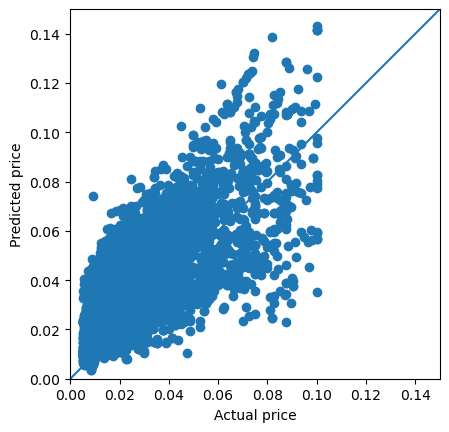

<Figure size 400x100 with 0 Axes>

In [ ]:
# graphPredictions(model, x, y,0,0.15)
# f = plt.figure()
# f.set_figwidth(4)
# f.set_figheight(1)

# plt.show()

In [ ]:
a=[]
print("Enter Value to predict price :")
for i in feature_names:
  print(f"Enter value for {i}:")
  a.append(int(input()))

test_p = torch.tensor([a], dtype=torch.float, device=device)

k = model(test_p) 
a=k.tolist()
a=float(a[0][0])*(scale_max-scale_min) + scale_min
print(f"Price Predicted:{a}")

Enter Value to predict price :
Enter value for Area:
200
Enter value for No. of Bedrooms:
3
Enter value for Wardrobe:
1
Enter value for AC:
0
Enter value for Playground:
0
Price Predicted:12.477222442626953
